## Building Artificial Neural Network Architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
sb.set()

import pickle
from tensorflow.keras.models import save_model

In [2]:
x_train_df = pd.read_csv('x_train.csv', index_col=0)
x_test_df = pd.read_csv('x_test.csv', index_col=0)
y_train_df = pd.read_csv('y_train.csv', index_col=0)
y_test_df = pd.read_csv('y_test.csv', index_col=0)

In [3]:
sc_x = StandardScaler()

x_train_scaled = sc_x.fit_transform(x_train_df.values[:,:2])
x_test_scaled = sc_x.transform(x_test_df.values[:,:2])

In [4]:
X_train = np.concatenate((x_train_scaled, x_train_df.values[:,2:]), axis=1)
x_test = np.concatenate((x_test_scaled, x_test_df.values[:,2:]), axis=1)
y_test = y_test_df.values

In [5]:
x_train, x_validate, y_train, y_validate = train_test_split(X_train, y_train_df.values, test_size = 0.2, random_state=1)

In [6]:
input_layer_size = x_train.shape[1]

def make_regression_model(units=6, activation1='sigmoid', activation2='linear', initializer='he_normal', rate=00, lr=0.01):

    model = Sequential()
    model.add(Dense(units=units, activation=activation1, kernel_initializer=initializer, input_shape=(input_layer_size,)))
    model.add(Dropout(rate))
    model.add(Dense(output_size, activation=activation2))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr), loss = 'mse', metrics = ['mae'])
    return model

In [7]:
#Choosing the number on neurons in the hidden layer
scores = {}
results0 = {}
results1 = {}
batch_size = 4
max_epochs = 600
parameters = [2,3,4,6,8,10,12,14,16]
output_size = 2

for parameter in parameters:
    print(parameter)
    model = make_regression_model()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=max_epochs,
                        validation_data=(x_validate, y_validate), verbose = 1) 
    scores[parameter] = history.history
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    r2_train0 = np.round(r2_score(np.exp(y_train[:,0]), np.exp(y_hat_train[:,0])), 5)
    r2_test0 = np.round(r2_score(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0])), 5)
    mean_abs_error0 = np.round(mean_absolute_error(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0])), 0)
    mean_sq_error0 = np.round(np.sqrt(mean_squared_error(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0]))),0)
    mean_abs_percent_error0 = np.round(mean_absolute_percentage_error(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0])),3)*100
    r2_train1 = np.round(r2_score(np.exp(y_train[:,1]), np.exp(y_hat_train[:,1])), 5)
    r2_test1 = np.round(r2_score(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1])), 5)
    mean_abs_error1 = np.round(mean_absolute_error(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1])), 0)
    mean_sq_error1 = np.round(np.sqrt(mean_squared_error(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1]))),0)
    mean_abs_percent_error1 = np.round(mean_absolute_percentage_error(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1])),3)*100
    results0[parameter] = [r2_train0, r2_test0, mean_abs_error0, mean_sq_error0, mean_abs_percent_error0]
    results1[parameter] = [r2_train1, r2_test1, mean_abs_error1, mean_sq_error1, mean_abs_percent_error1]

2
Epoch 1/600
16/16 [==============================] - 1s 17ms/step - loss: 1.3599 - mae: 0.8936 - val_loss: 1.0696 - val_mae: 0.7693
Epoch 2/600
16/16 [==============================] - 0s 4ms/step - loss: 0.5951 - mae: 0.5585 - val_loss: 0.5925 - val_mae: 0.5800
Epoch 3/600
16/16 [==============================] - 0s 3ms/step - loss: 0.3592 - mae: 0.4410 - val_loss: 0.3911 - val_mae: 0.4841
Epoch 4/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2665 - mae: 0.3948 - val_loss: 0.3021 - val_mae: 0.4349
Epoch 5/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2204 - mae: 0.3677 - val_loss: 0.2727 - val_mae: 0.4077
Epoch 6/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1916 - mae: 0.3411 - val_loss: 0.2438 - val_mae: 0.3826
Epoch 7/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1599 - mae: 0.3149 - val_loss: 0.1855 - val_mae: 0.3283
Epoch 8/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1338 

16/16 [==============================] - 0s 3ms/step - loss: 0.0439 - mae: 0.1684 - val_loss: 0.0988 - val_mae: 0.2296
Epoch 64/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0452 - mae: 0.1685 - val_loss: 0.0907 - val_mae: 0.2136
Epoch 65/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1658 - val_loss: 0.0909 - val_mae: 0.2124
Epoch 66/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0430 - mae: 0.1647 - val_loss: 0.0887 - val_mae: 0.2110
Epoch 67/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0454 - mae: 0.1683 - val_loss: 0.0901 - val_mae: 0.2157
Epoch 68/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0413 - mae: 0.1607 - val_loss: 0.0958 - val_mae: 0.2253
Epoch 69/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0425 - mae: 0.1636 - val_loss: 0.0905 - val_mae: 0.2129
Epoch 70/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0432 - mae: 0

Epoch 125/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1442 - val_loss: 0.0832 - val_mae: 0.2234
Epoch 126/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0329 - mae: 0.1521 - val_loss: 0.0805 - val_mae: 0.2085
Epoch 127/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0323 - mae: 0.1480 - val_loss: 0.0812 - val_mae: 0.2103
Epoch 128/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1442 - val_loss: 0.0801 - val_mae: 0.2147
Epoch 129/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1489 - val_loss: 0.0779 - val_mae: 0.2063
Epoch 130/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1439 - val_loss: 0.0820 - val_mae: 0.2203
Epoch 131/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1438 - val_loss: 0.0788 - val_mae: 0.2080
Epoch 132/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0307 - mae: 0.1453 - val_loss: 0.0798 - val_mae: 0.2068
Epoch 187/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1436 - val_loss: 0.0790 - val_mae: 0.2044
Epoch 188/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1459 - val_loss: 0.0808 - val_mae: 0.2073
Epoch 189/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1473 - val_loss: 0.0788 - val_mae: 0.2093
Epoch 190/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1460 - val_loss: 0.0788 - val_mae: 0.2074
Epoch 191/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1456 - val_loss: 0.0791 - val_mae: 0.2134
Epoch 192/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1455 - val_loss: 0.0787 - val_mae: 0.2048
Epoch 193/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 -

Epoch 248/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0309 - mae: 0.1427 - val_loss: 0.0773 - val_mae: 0.2065
Epoch 249/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1451 - val_loss: 0.0778 - val_mae: 0.2137
Epoch 250/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mae: 0.1445 - val_loss: 0.0788 - val_mae: 0.2101
Epoch 251/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1398 - val_loss: 0.0811 - val_mae: 0.2221
Epoch 252/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1418 - val_loss: 0.0779 - val_mae: 0.2119
Epoch 253/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1433 - val_loss: 0.0779 - val_mae: 0.2051
Epoch 254/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mae: 0.1419 - val_loss: 0.0784 - val_mae: 0.2104
Epoch 255/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1428 - val_loss: 0.0784 - val_mae: 0.2065
Epoch 310/600
16/16 [==============================] - 0s 5ms/step - loss: 0.0295 - mae: 0.1411 - val_loss: 0.0802 - val_mae: 0.2031
Epoch 311/600
16/16 [==============================] - 0s 5ms/step - loss: 0.0284 - mae: 0.1361 - val_loss: 0.0779 - val_mae: 0.2168
Epoch 312/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0311 - mae: 0.1430 - val_loss: 0.0776 - val_mae: 0.2047
Epoch 313/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0305 - mae: 0.1397 - val_loss: 0.0768 - val_mae: 0.2037
Epoch 314/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0298 - mae: 0.1426 - val_loss: 0.0782 - val_mae: 0.2066
Epoch 315/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1398 - val_loss: 0.0773 - val_mae: 0.2041
Epoch 316/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 -

Epoch 371/600
16/16 [==============================] - 0s 5ms/step - loss: 0.0289 - mae: 0.1392 - val_loss: 0.0754 - val_mae: 0.2112
Epoch 372/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0303 - mae: 0.1416 - val_loss: 0.0739 - val_mae: 0.2060
Epoch 373/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0282 - mae: 0.1375 - val_loss: 0.0740 - val_mae: 0.1989
Epoch 374/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1376 - val_loss: 0.0747 - val_mae: 0.2084
Epoch 375/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0284 - mae: 0.1363 - val_loss: 0.0765 - val_mae: 0.2029
Epoch 376/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1400 - val_loss: 0.0749 - val_mae: 0.2022
Epoch 377/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0297 - mae: 0.1398 - val_loss: 0.0738 - val_mae: 0.2045
Epoch 378/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1366 - val_loss: 0.0743 - val_mae: 0.1976
Epoch 433/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0284 - mae: 0.1338 - val_loss: 0.0755 - val_mae: 0.2008
Epoch 434/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0272 - mae: 0.1305 - val_loss: 0.0761 - val_mae: 0.2095
Epoch 435/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1334 - val_loss: 0.0826 - val_mae: 0.1998
Epoch 436/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1335 - val_loss: 0.0755 - val_mae: 0.2057
Epoch 437/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1347 - val_loss: 0.0748 - val_mae: 0.2031
Epoch 438/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1326 - val_loss: 0.0751 - val_mae: 0.1976
Epoch 439/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0290 -

Epoch 494/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1288 - val_loss: 0.0741 - val_mae: 0.2050
Epoch 495/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0283 - mae: 0.1352 - val_loss: 0.0755 - val_mae: 0.2056
Epoch 496/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0274 - mae: 0.1325 - val_loss: 0.0745 - val_mae: 0.2045
Epoch 497/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1294 - val_loss: 0.0732 - val_mae: 0.2030
Epoch 498/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0284 - mae: 0.1347 - val_loss: 0.0758 - val_mae: 0.2093
Epoch 499/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1327 - val_loss: 0.0743 - val_mae: 0.2057
Epoch 500/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1347 - val_loss: 0.0745 - val_mae: 0.2005
Epoch 501/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 4ms/step - loss: 0.0281 - mae: 0.1284 - val_loss: 0.0737 - val_mae: 0.2019
Epoch 556/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1315 - val_loss: 0.0760 - val_mae: 0.2056
Epoch 557/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0280 - mae: 0.1288 - val_loss: 0.0738 - val_mae: 0.2036
Epoch 558/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0277 - mae: 0.1316 - val_loss: 0.0757 - val_mae: 0.2015
Epoch 559/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1318 - val_loss: 0.0800 - val_mae: 0.2050
Epoch 560/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1315 - val_loss: 0.0733 - val_mae: 0.1998
Epoch 561/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1319 - val_loss: 0.0764 - val_mae: 0.1974
Epoch 562/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0275 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0797 - mae: 0.2123 - val_loss: 0.1407 - val_mae: 0.2568
Epoch 17/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0747 - mae: 0.2128 - val_loss: 0.1347 - val_mae: 0.2528
Epoch 18/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0718 - mae: 0.2040 - val_loss: 0.1281 - val_mae: 0.2480
Epoch 19/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0731 - mae: 0.2071 - val_loss: 0.1229 - val_mae: 0.2457
Epoch 20/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0696 - mae: 0.2025 - val_loss: 0.1290 - val_mae: 0.2537
Epoch 21/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0678 - mae: 0.2024 - val_loss: 0.1227 - val_mae: 0.2445
Epoch 22/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0679 - mae: 0.2038 - val_loss: 0.1199 - val_mae: 0.2421
Epoch 23/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0659 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1564 - val_loss: 0.0844 - val_mae: 0.2117
Epoch 79/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0377 - mae: 0.1566 - val_loss: 0.0884 - val_mae: 0.2162
Epoch 80/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0392 - mae: 0.1529 - val_loss: 0.0850 - val_mae: 0.2150
Epoch 81/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.1507 - val_loss: 0.0891 - val_mae: 0.2196
Epoch 82/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1574 - val_loss: 0.0852 - val_mae: 0.2124
Epoch 83/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0389 - mae: 0.1575 - val_loss: 0.0897 - val_mae: 0.2167
Epoch 84/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0379 - mae: 0.1561 - val_loss: 0.0878 - val_mae: 0.2288
Epoch 85/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0384 - mae: 0

Epoch 140/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0315 - mae: 0.1460 - val_loss: 0.0895 - val_mae: 0.2325
Epoch 141/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0330 - mae: 0.1441 - val_loss: 0.0882 - val_mae: 0.2229
Epoch 142/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1472 - val_loss: 0.0854 - val_mae: 0.2304
Epoch 143/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0328 - mae: 0.1451 - val_loss: 0.0857 - val_mae: 0.2132
Epoch 144/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0336 - mae: 0.1442 - val_loss: 0.0837 - val_mae: 0.2143
Epoch 145/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1401 - val_loss: 0.0920 - val_mae: 0.2304
Epoch 146/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1420 - val_loss: 0.0845 - val_mae: 0.2204
Epoch 147/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1435 - val_loss: 0.0869 - val_mae: 0.2376
Epoch 202/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1443 - val_loss: 0.0865 - val_mae: 0.2349
Epoch 203/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0314 - mae: 0.1454 - val_loss: 0.0842 - val_mae: 0.2228
Epoch 204/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1380 - val_loss: 0.0834 - val_mae: 0.2247
Epoch 205/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0309 - mae: 0.1405 - val_loss: 0.0864 - val_mae: 0.2303
Epoch 206/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1402 - val_loss: 0.0860 - val_mae: 0.2350
Epoch 207/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1424 - val_loss: 0.0887 - val_mae: 0.2231
Epoch 208/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0318 -

Epoch 263/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1384 - val_loss: 0.0876 - val_mae: 0.2257
Epoch 264/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1410 - val_loss: 0.0873 - val_mae: 0.2258
Epoch 265/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0295 - mae: 0.1360 - val_loss: 0.0891 - val_mae: 0.2219
Epoch 266/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1327 - val_loss: 0.1028 - val_mae: 0.2498
Epoch 267/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1440 - val_loss: 0.0880 - val_mae: 0.2253
Epoch 268/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - mae: 0.1388 - val_loss: 0.0892 - val_mae: 0.2358
Epoch 269/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1392 - val_loss: 0.0864 - val_mae: 0.2231
Epoch 270/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1374 - val_loss: 0.0909 - val_mae: 0.2357
Epoch 325/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1352 - val_loss: 0.0880 - val_mae: 0.2318
Epoch 326/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0300 - mae: 0.1417 - val_loss: 0.0888 - val_mae: 0.2347
Epoch 327/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.1356 - val_loss: 0.0912 - val_mae: 0.2330
Epoch 328/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1334 - val_loss: 0.0890 - val_mae: 0.2305
Epoch 329/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1384 - val_loss: 0.0897 - val_mae: 0.2331
Epoch 330/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0277 - mae: 0.1331 - val_loss: 0.0918 - val_mae: 0.2403
Epoch 331/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 -

Epoch 386/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1341 - val_loss: 0.0929 - val_mae: 0.2420
Epoch 387/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1384 - val_loss: 0.0914 - val_mae: 0.2359
Epoch 388/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1333 - val_loss: 0.0967 - val_mae: 0.2335
Epoch 389/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1322 - val_loss: 0.0967 - val_mae: 0.2472
Epoch 390/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1337 - val_loss: 0.0915 - val_mae: 0.2344
Epoch 391/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1298 - val_loss: 0.0916 - val_mae: 0.2379
Epoch 392/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1328 - val_loss: 0.0946 - val_mae: 0.2325
Epoch 393/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1339 - val_loss: 0.0926 - val_mae: 0.2457
Epoch 448/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1360 - val_loss: 0.0948 - val_mae: 0.2477
Epoch 449/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1328 - val_loss: 0.0930 - val_mae: 0.2390
Epoch 450/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1355 - val_loss: 0.0940 - val_mae: 0.2452
Epoch 451/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1269 - val_loss: 0.0949 - val_mae: 0.2500
Epoch 452/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1318 - val_loss: 0.0981 - val_mae: 0.2539
Epoch 453/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1335 - val_loss: 0.0941 - val_mae: 0.2484
Epoch 454/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 -

Epoch 509/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0270 - mae: 0.1345 - val_loss: 0.0965 - val_mae: 0.2479
Epoch 510/600
16/16 [==============================] - 0s 5ms/step - loss: 0.0285 - mae: 0.1348 - val_loss: 0.0945 - val_mae: 0.2448
Epoch 511/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0272 - mae: 0.1315 - val_loss: 0.0962 - val_mae: 0.2400
Epoch 512/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0275 - mae: 0.1322 - val_loss: 0.0993 - val_mae: 0.2348
Epoch 513/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0271 - mae: 0.1340 - val_loss: 0.0962 - val_mae: 0.2447
Epoch 514/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0281 - mae: 0.1346 - val_loss: 0.0976 - val_mae: 0.2533
Epoch 515/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0262 - mae: 0.1294 - val_loss: 0.0946 - val_mae: 0.2378
Epoch 516/600
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1389 - val_loss: 0.0963 - val_mae: 0.2474
Epoch 571/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1310 - val_loss: 0.0954 - val_mae: 0.2448
Epoch 572/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1295 - val_loss: 0.0990 - val_mae: 0.2549
Epoch 573/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0284 - mae: 0.1354 - val_loss: 0.0998 - val_mae: 0.2481
Epoch 574/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1334 - val_loss: 0.0965 - val_mae: 0.2468
Epoch 575/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1332 - val_loss: 0.0961 - val_mae: 0.2468
Epoch 576/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1350 - val_loss: 0.0990 - val_mae: 0.2564
Epoch 577/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0591 - mae: 0.1895 - val_loss: 0.1173 - val_mae: 0.2537
Epoch 32/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0624 - mae: 0.1928 - val_loss: 0.1117 - val_mae: 0.2460
Epoch 33/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0596 - mae: 0.1930 - val_loss: 0.1062 - val_mae: 0.2300
Epoch 34/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.1846 - val_loss: 0.1052 - val_mae: 0.2313
Epoch 35/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0543 - mae: 0.1823 - val_loss: 0.1072 - val_mae: 0.2332
Epoch 36/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.1909 - val_loss: 0.1040 - val_mae: 0.2205
Epoch 37/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0562 - mae: 0.1913 - val_loss: 0.1053 - val_mae: 0.2210
Epoch 38/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0547 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0423 - mae: 0.1654 - val_loss: 0.0855 - val_mae: 0.2118
Epoch 94/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0399 - mae: 0.1641 - val_loss: 0.0851 - val_mae: 0.2155
Epoch 95/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0425 - mae: 0.1684 - val_loss: 0.0820 - val_mae: 0.2030
Epoch 96/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0399 - mae: 0.1643 - val_loss: 0.0854 - val_mae: 0.2095
Epoch 97/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0420 - mae: 0.1646 - val_loss: 0.0841 - val_mae: 0.2043
Epoch 98/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.1635 - val_loss: 0.0907 - val_mae: 0.2195
Epoch 99/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0410 - mae: 0.1620 - val_loss: 0.0811 - val_mae: 0.2004
Epoch 100/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0399 - mae: 

Epoch 155/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0330 - mae: 0.1476 - val_loss: 0.0781 - val_mae: 0.1954
Epoch 156/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0325 - mae: 0.1481 - val_loss: 0.0793 - val_mae: 0.2024
Epoch 157/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0324 - mae: 0.1477 - val_loss: 0.0808 - val_mae: 0.1976
Epoch 158/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1479 - val_loss: 0.0791 - val_mae: 0.2008
Epoch 159/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0336 - mae: 0.1466 - val_loss: 0.0782 - val_mae: 0.1993
Epoch 160/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0325 - mae: 0.1453 - val_loss: 0.0779 - val_mae: 0.2025
Epoch 161/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0340 - mae: 0.1493 - val_loss: 0.0800 - val_mae: 0.2067
Epoch 162/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 4ms/step - loss: 0.0317 - mae: 0.1436 - val_loss: 0.0765 - val_mae: 0.2006
Epoch 217/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1389 - val_loss: 0.0765 - val_mae: 0.2020
Epoch 218/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0308 - mae: 0.1405 - val_loss: 0.0805 - val_mae: 0.2105
Epoch 219/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1431 - val_loss: 0.0769 - val_mae: 0.2006
Epoch 220/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - mae: 0.1427 - val_loss: 0.0776 - val_mae: 0.2009
Epoch 221/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0305 - mae: 0.1422 - val_loss: 0.0788 - val_mae: 0.2022
Epoch 222/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0306 - mae: 0.1473 - val_loss: 0.0787 - val_mae: 0.2058
Epoch 223/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 -

Epoch 278/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1363 - val_loss: 0.0787 - val_mae: 0.2082
Epoch 279/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1426 - val_loss: 0.0779 - val_mae: 0.2101
Epoch 280/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1380 - val_loss: 0.0837 - val_mae: 0.2111
Epoch 281/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0298 - mae: 0.1413 - val_loss: 0.0819 - val_mae: 0.2148
Epoch 282/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1368 - val_loss: 0.0798 - val_mae: 0.2155
Epoch 283/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1389 - val_loss: 0.0803 - val_mae: 0.2107
Epoch 284/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1403 - val_loss: 0.0768 - val_mae: 0.2059
Epoch 285/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1405 - val_loss: 0.0793 - val_mae: 0.2097
Epoch 340/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - mae: 0.1332 - val_loss: 0.0804 - val_mae: 0.2098
Epoch 341/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1387 - val_loss: 0.0781 - val_mae: 0.2088
Epoch 342/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1327 - val_loss: 0.0835 - val_mae: 0.2206
Epoch 343/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0298 - mae: 0.1395 - val_loss: 0.0784 - val_mae: 0.2094
Epoch 344/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1414 - val_loss: 0.0794 - val_mae: 0.2097
Epoch 345/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1332 - val_loss: 0.0786 - val_mae: 0.2110
Epoch 346/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 -

Epoch 401/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1380 - val_loss: 0.0831 - val_mae: 0.2198
Epoch 402/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1393 - val_loss: 0.0809 - val_mae: 0.2155
Epoch 403/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1313 - val_loss: 0.0829 - val_mae: 0.2165
Epoch 404/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1369 - val_loss: 0.0912 - val_mae: 0.2296
Epoch 405/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1358 - val_loss: 0.0801 - val_mae: 0.2141
Epoch 406/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1330 - val_loss: 0.0807 - val_mae: 0.2210
Epoch 407/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1369 - val_loss: 0.0845 - val_mae: 0.2167
Epoch 408/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1334 - val_loss: 0.0828 - val_mae: 0.2167
Epoch 463/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - mae: 0.1363 - val_loss: 0.0866 - val_mae: 0.2180
Epoch 464/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1297 - val_loss: 0.0870 - val_mae: 0.2263
Epoch 465/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - mae: 0.1375 - val_loss: 0.0816 - val_mae: 0.2165
Epoch 466/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1333 - val_loss: 0.0843 - val_mae: 0.2171
Epoch 467/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0293 - mae: 0.1345 - val_loss: 0.0834 - val_mae: 0.2176
Epoch 468/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1346 - val_loss: 0.0826 - val_mae: 0.2183
Epoch 469/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 -

Epoch 524/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1318 - val_loss: 0.0857 - val_mae: 0.2181
Epoch 525/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1312 - val_loss: 0.0904 - val_mae: 0.2315
Epoch 526/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1366 - val_loss: 0.0834 - val_mae: 0.2186
Epoch 527/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1295 - val_loss: 0.0961 - val_mae: 0.2337
Epoch 528/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1292 - val_loss: 0.0863 - val_mae: 0.2207
Epoch 529/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.1377 - val_loss: 0.0829 - val_mae: 0.2180
Epoch 530/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1330 - val_loss: 0.0847 - val_mae: 0.2192
Epoch 531/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1345 - val_loss: 0.0878 - val_mae: 0.2223
Epoch 586/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1284 - val_loss: 0.0908 - val_mae: 0.2264
Epoch 587/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1300 - val_loss: 0.0886 - val_mae: 0.2229
Epoch 588/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1350 - val_loss: 0.0872 - val_mae: 0.2225
Epoch 589/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1303 - val_loss: 0.0838 - val_mae: 0.2209
Epoch 590/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0264 - mae: 0.1285 - val_loss: 0.0864 - val_mae: 0.2196
Epoch 591/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1306 - val_loss: 0.0849 - val_mae: 0.2192
Epoch 592/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0522 - mae: 0.1800 - val_loss: 0.0983 - val_mae: 0.2173
Epoch 36/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1781 - val_loss: 0.1057 - val_mae: 0.2443
Epoch 37/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0530 - mae: 0.1840 - val_loss: 0.0977 - val_mae: 0.2233
Epoch 38/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0518 - mae: 0.1822 - val_loss: 0.0957 - val_mae: 0.2174
Epoch 39/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0499 - mae: 0.1781 - val_loss: 0.1054 - val_mae: 0.2456
Epoch 40/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0514 - mae: 0.1815 - val_loss: 0.0961 - val_mae: 0.2234
Epoch 41/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0500 - mae: 0.1745 - val_loss: 0.0982 - val_mae: 0.2319
Epoch 42/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0477 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0377 - mae: 0.1562 - val_loss: 0.0901 - val_mae: 0.2260
Epoch 98/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1585 - val_loss: 0.0865 - val_mae: 0.2196
Epoch 99/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0396 - mae: 0.1581 - val_loss: 0.0842 - val_mae: 0.2188
Epoch 100/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0386 - mae: 0.1568 - val_loss: 0.0855 - val_mae: 0.2217
Epoch 101/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - mae: 0.1575 - val_loss: 0.0844 - val_mae: 0.2147
Epoch 102/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0.1586 - val_loss: 0.0851 - val_mae: 0.2158
Epoch 103/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1572 - val_loss: 0.0840 - val_mae: 0.2205
Epoch 104/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0387 - m

Epoch 159/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0349 - mae: 0.1533 - val_loss: 0.0828 - val_mae: 0.2277
Epoch 160/600
16/16 [==============================] - 0s 7ms/step - loss: 0.0344 - mae: 0.1502 - val_loss: 0.0848 - val_mae: 0.2203
Epoch 161/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0359 - mae: 0.1519 - val_loss: 0.0818 - val_mae: 0.2216
Epoch 162/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0356 - mae: 0.1542 - val_loss: 0.0812 - val_mae: 0.2240
Epoch 163/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0361 - mae: 0.1519 - val_loss: 0.0835 - val_mae: 0.2212
Epoch 164/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0324 - mae: 0.1465 - val_loss: 0.0859 - val_mae: 0.2324
Epoch 165/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0356 - mae: 0.1509 - val_loss: 0.0840 - val_mae: 0.2295
Epoch 166/600
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 4ms/step - loss: 0.0344 - mae: 0.1539 - val_loss: 0.0901 - val_mae: 0.2235
Epoch 221/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0350 - mae: 0.1545 - val_loss: 0.0817 - val_mae: 0.2233
Epoch 222/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0324 - mae: 0.1488 - val_loss: 0.0821 - val_mae: 0.2217
Epoch 223/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0333 - mae: 0.1509 - val_loss: 0.0799 - val_mae: 0.2223
Epoch 224/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0322 - mae: 0.1484 - val_loss: 0.0815 - val_mae: 0.2168
Epoch 225/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0316 - mae: 0.1433 - val_loss: 0.0815 - val_mae: 0.2230
Epoch 226/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0334 - mae: 0.1525 - val_loss: 0.0849 - val_mae: 0.2177
Epoch 227/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0339 -

Epoch 282/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0320 - mae: 0.1467 - val_loss: 0.0856 - val_mae: 0.2113
Epoch 283/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1456 - val_loss: 0.0823 - val_mae: 0.2270
Epoch 284/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0343 - mae: 0.1546 - val_loss: 0.0808 - val_mae: 0.2157
Epoch 285/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0322 - mae: 0.1520 - val_loss: 0.0816 - val_mae: 0.2194
Epoch 286/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1480 - val_loss: 0.0828 - val_mae: 0.2335
Epoch 287/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0318 - mae: 0.1445 - val_loss: 0.0794 - val_mae: 0.2139
Epoch 288/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0323 - mae: 0.1487 - val_loss: 0.0798 - val_mae: 0.2154
Epoch 289/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0318 - mae: 0.1452 - val_loss: 0.0782 - val_mae: 0.2116
Epoch 344/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0312 - mae: 0.1464 - val_loss: 0.0783 - val_mae: 0.2114
Epoch 345/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0311 - mae: 0.1457 - val_loss: 0.0802 - val_mae: 0.2087
Epoch 346/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1451 - val_loss: 0.0788 - val_mae: 0.2148
Epoch 347/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0325 - mae: 0.1478 - val_loss: 0.0796 - val_mae: 0.2136
Epoch 348/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1461 - val_loss: 0.0788 - val_mae: 0.2174
Epoch 349/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1421 - val_loss: 0.0811 - val_mae: 0.2186
Epoch 350/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 -

Epoch 405/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0315 - mae: 0.1453 - val_loss: 0.0799 - val_mae: 0.2089
Epoch 406/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0285 - mae: 0.1390 - val_loss: 0.0791 - val_mae: 0.2133
Epoch 407/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0307 - mae: 0.1436 - val_loss: 0.0810 - val_mae: 0.2051
Epoch 408/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1413 - val_loss: 0.0893 - val_mae: 0.2290
Epoch 409/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1445 - val_loss: 0.0782 - val_mae: 0.2221
Epoch 410/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1377 - val_loss: 0.0826 - val_mae: 0.2130
Epoch 411/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0305 - mae: 0.1421 - val_loss: 0.0786 - val_mae: 0.2064
Epoch 412/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.0295 - mae: 0.1411 - val_loss: 0.0792 - val_mae: 0.2114
Epoch 467/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1390 - val_loss: 0.0842 - val_mae: 0.2106
Epoch 468/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0309 - mae: 0.1396 - val_loss: 0.0788 - val_mae: 0.2184
Epoch 469/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0298 - mae: 0.1406 - val_loss: 0.0806 - val_mae: 0.2093
Epoch 470/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0298 - mae: 0.1413 - val_loss: 0.0852 - val_mae: 0.2097
Epoch 471/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0304 - mae: 0.1425 - val_loss: 0.0816 - val_mae: 0.2135
Epoch 472/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0304 - mae: 0.1425 - val_loss: 0.0881 - val_mae: 0.2085
Epoch 473/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 -

Epoch 528/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0313 - mae: 0.1436 - val_loss: 0.0808 - val_mae: 0.2152
Epoch 529/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - mae: 0.1388 - val_loss: 0.0842 - val_mae: 0.2143
Epoch 530/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1400 - val_loss: 0.0809 - val_mae: 0.2184
Epoch 531/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1429 - val_loss: 0.0834 - val_mae: 0.2299
Epoch 532/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1470 - val_loss: 0.0809 - val_mae: 0.2221
Epoch 533/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1430 - val_loss: 0.0891 - val_mae: 0.2239
Epoch 534/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1424 - val_loss: 0.0884 - val_mae: 0.2204
Epoch 535/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0307 - mae: 0.1414 - val_loss: 0.0808 - val_mae: 0.2169
Epoch 590/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1398 - val_loss: 0.0809 - val_mae: 0.2196
Epoch 591/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.1386 - val_loss: 0.0883 - val_mae: 0.2226
Epoch 592/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1436 - val_loss: 0.0845 - val_mae: 0.2161
Epoch 593/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1397 - val_loss: 0.0832 - val_mae: 0.2159
Epoch 594/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1402 - val_loss: 0.0850 - val_mae: 0.2143
Epoch 595/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1420 - val_loss: 0.0849 - val_mae: 0.2158
Epoch 596/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0288 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0463 - mae: 0.1713 - val_loss: 0.0889 - val_mae: 0.2144
Epoch 51/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0470 - mae: 0.1751 - val_loss: 0.0900 - val_mae: 0.2131
Epoch 52/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0474 - mae: 0.1715 - val_loss: 0.0977 - val_mae: 0.2384
Epoch 53/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0469 - mae: 0.1713 - val_loss: 0.0937 - val_mae: 0.2211
Epoch 54/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.1678 - val_loss: 0.0879 - val_mae: 0.2150
Epoch 55/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.1701 - val_loss: 0.0885 - val_mae: 0.2096
Epoch 56/600
16/16 [==============================] - 0s 5ms/step - loss: 0.0449 - mae: 0.1711 - val_loss: 0.0899 - val_mae: 0.2118
Epoch 57/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0452 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1526 - val_loss: 0.0794 - val_mae: 0.2074
Epoch 113/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0354 - mae: 0.1493 - val_loss: 0.0808 - val_mae: 0.1990
Epoch 114/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0327 - mae: 0.1455 - val_loss: 0.0790 - val_mae: 0.2031
Epoch 115/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0337 - mae: 0.1486 - val_loss: 0.0899 - val_mae: 0.2246
Epoch 116/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0347 - mae: 0.1533 - val_loss: 0.0850 - val_mae: 0.2149
Epoch 117/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0338 - mae: 0.1443 - val_loss: 0.0798 - val_mae: 0.2058
Epoch 118/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0346 - mae: 0.1489 - val_loss: 0.0807 - val_mae: 0.2040
Epoch 119/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0323 -

Epoch 174/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0326 - mae: 0.1465 - val_loss: 0.0806 - val_mae: 0.2017
Epoch 175/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1408 - val_loss: 0.0812 - val_mae: 0.2093
Epoch 176/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1436 - val_loss: 0.0801 - val_mae: 0.2018
Epoch 177/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1417 - val_loss: 0.0819 - val_mae: 0.2174
Epoch 178/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0315 - mae: 0.1388 - val_loss: 0.0797 - val_mae: 0.2063
Epoch 179/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0330 - mae: 0.1463 - val_loss: 0.0826 - val_mae: 0.2090
Epoch 180/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0315 - mae: 0.1440 - val_loss: 0.0809 - val_mae: 0.2114
Epoch 181/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1453 - val_loss: 0.0787 - val_mae: 0.2104
Epoch 236/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1426 - val_loss: 0.0802 - val_mae: 0.2145
Epoch 237/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0318 - mae: 0.1430 - val_loss: 0.0785 - val_mae: 0.2078
Epoch 238/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1496 - val_loss: 0.0804 - val_mae: 0.2145
Epoch 239/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1442 - val_loss: 0.0808 - val_mae: 0.2126
Epoch 240/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0314 - mae: 0.1436 - val_loss: 0.0808 - val_mae: 0.2076
Epoch 241/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1434 - val_loss: 0.0836 - val_mae: 0.2132
Epoch 242/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 -

Epoch 297/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1385 - val_loss: 0.0826 - val_mae: 0.2111
Epoch 298/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0318 - mae: 0.1478 - val_loss: 0.0809 - val_mae: 0.2070
Epoch 299/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0302 - mae: 0.1386 - val_loss: 0.0835 - val_mae: 0.2144
Epoch 300/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0308 - mae: 0.1406 - val_loss: 0.0807 - val_mae: 0.2180
Epoch 301/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1419 - val_loss: 0.0792 - val_mae: 0.2114
Epoch 302/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1379 - val_loss: 0.0799 - val_mae: 0.2084
Epoch 303/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1434 - val_loss: 0.0798 - val_mae: 0.2130
Epoch 304/600
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1413 - val_loss: 0.0803 - val_mae: 0.2204
Epoch 359/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1452 - val_loss: 0.0768 - val_mae: 0.2089
Epoch 360/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0300 - mae: 0.1413 - val_loss: 0.0767 - val_mae: 0.2057
Epoch 361/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0302 - mae: 0.1430 - val_loss: 0.0784 - val_mae: 0.2108
Epoch 362/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1363 - val_loss: 0.0797 - val_mae: 0.2088
Epoch 363/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0298 - mae: 0.1416 - val_loss: 0.0853 - val_mae: 0.2114
Epoch 364/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1405 - val_loss: 0.0802 - val_mae: 0.2136
Epoch 365/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0298 -

Epoch 420/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1445 - val_loss: 0.0784 - val_mae: 0.2131
Epoch 421/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1419 - val_loss: 0.0782 - val_mae: 0.2115
Epoch 422/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1379 - val_loss: 0.0804 - val_mae: 0.2114
Epoch 423/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1405 - val_loss: 0.0784 - val_mae: 0.2121
Epoch 424/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1395 - val_loss: 0.0788 - val_mae: 0.2081
Epoch 425/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0304 - mae: 0.1470 - val_loss: 0.0779 - val_mae: 0.2105
Epoch 426/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1423 - val_loss: 0.0775 - val_mae: 0.2128
Epoch 427/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.0310 - mae: 0.1437 - val_loss: 0.0791 - val_mae: 0.2083
Epoch 482/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1357 - val_loss: 0.0788 - val_mae: 0.2185
Epoch 483/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0298 - mae: 0.1412 - val_loss: 0.0833 - val_mae: 0.2190
Epoch 484/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1394 - val_loss: 0.0835 - val_mae: 0.2091
Epoch 485/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1406 - val_loss: 0.0799 - val_mae: 0.2084
Epoch 486/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1384 - val_loss: 0.0783 - val_mae: 0.2165
Epoch 487/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1395 - val_loss: 0.0801 - val_mae: 0.2102
Epoch 488/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 -

Epoch 543/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1396 - val_loss: 0.0825 - val_mae: 0.2113
Epoch 544/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - mae: 0.1380 - val_loss: 0.0782 - val_mae: 0.2114
Epoch 545/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1408 - val_loss: 0.0778 - val_mae: 0.2132
Epoch 546/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mae: 0.1420 - val_loss: 0.0799 - val_mae: 0.2086
Epoch 547/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1363 - val_loss: 0.0784 - val_mae: 0.2135
Epoch 548/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0286 - mae: 0.1379 - val_loss: 0.0845 - val_mae: 0.2249
Epoch 549/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0302 - mae: 0.1428 - val_loss: 0.0789 - val_mae: 0.2122
Epoch 550/600
16/16 [==============================] - 0s 4ms/step - 

Epoch 4/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2636 - mae: 0.4178 - val_loss: 0.2771 - val_mae: 0.4085
Epoch 5/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2366 - mae: 0.3970 - val_loss: 0.2459 - val_mae: 0.3850
Epoch 6/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2147 - mae: 0.3787 - val_loss: 0.2422 - val_mae: 0.3763
Epoch 7/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1914 - mae: 0.3542 - val_loss: 0.2585 - val_mae: 0.3878
Epoch 8/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1764 - mae: 0.3411 - val_loss: 0.2333 - val_mae: 0.3577
Epoch 9/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1566 - mae: 0.3209 - val_loss: 0.2169 - val_mae: 0.3470
Epoch 10/600
16/16 [==============================] - 0s 3ms/step - loss: 0.1398 - mae: 0.3029 - val_loss: 0.1948 - val_mae: 0.3308
Epoch 11/600
16/16 [==============================] - 0s 4ms/step - loss: 0.1229 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0506 - mae: 0.1847 - val_loss: 0.0958 - val_mae: 0.2214
Epoch 67/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0485 - mae: 0.1805 - val_loss: 0.0975 - val_mae: 0.2147
Epoch 68/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0505 - mae: 0.1803 - val_loss: 0.0959 - val_mae: 0.2254
Epoch 69/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0471 - mae: 0.1738 - val_loss: 0.0960 - val_mae: 0.2222
Epoch 70/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0483 - mae: 0.1749 - val_loss: 0.0945 - val_mae: 0.2151
Epoch 71/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.1773 - val_loss: 0.0946 - val_mae: 0.2161
Epoch 72/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0467 - mae: 0.1747 - val_loss: 0.0983 - val_mae: 0.2295
Epoch 73/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0472 - mae: 0

Epoch 128/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1436 - val_loss: 0.0919 - val_mae: 0.2193
Epoch 129/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0327 - mae: 0.1480 - val_loss: 0.0818 - val_mae: 0.2085
Epoch 130/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0324 - mae: 0.1444 - val_loss: 0.0841 - val_mae: 0.2081
Epoch 131/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0324 - mae: 0.1467 - val_loss: 0.0834 - val_mae: 0.2092
Epoch 132/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1428 - val_loss: 0.0852 - val_mae: 0.2129
Epoch 133/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0328 - mae: 0.1442 - val_loss: 0.0835 - val_mae: 0.2094
Epoch 134/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0318 - mae: 0.1418 - val_loss: 0.0807 - val_mae: 0.2154
Epoch 135/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mae: 0.1391 - val_loss: 0.0841 - val_mae: 0.2218
Epoch 190/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1408 - val_loss: 0.0836 - val_mae: 0.2199
Epoch 191/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1393 - val_loss: 0.0855 - val_mae: 0.2197
Epoch 192/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1391 - val_loss: 0.0917 - val_mae: 0.2263
Epoch 193/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1376 - val_loss: 0.0906 - val_mae: 0.2224
Epoch 194/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1351 - val_loss: 0.0842 - val_mae: 0.2269
Epoch 195/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1402 - val_loss: 0.0834 - val_mae: 0.2255
Epoch 196/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 -

Epoch 251/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1355 - val_loss: 0.0907 - val_mae: 0.2176
Epoch 252/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1317 - val_loss: 0.0870 - val_mae: 0.2305
Epoch 253/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1357 - val_loss: 0.0862 - val_mae: 0.2289
Epoch 254/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1373 - val_loss: 0.0904 - val_mae: 0.2192
Epoch 255/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1328 - val_loss: 0.0866 - val_mae: 0.2251
Epoch 256/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1370 - val_loss: 0.0869 - val_mae: 0.2221
Epoch 257/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - mae: 0.1366 - val_loss: 0.0870 - val_mae: 0.2186
Epoch 258/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1342 - val_loss: 0.0909 - val_mae: 0.2240
Epoch 313/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1292 - val_loss: 0.0855 - val_mae: 0.2223
Epoch 314/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1327 - val_loss: 0.0905 - val_mae: 0.2220
Epoch 315/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1366 - val_loss: 0.0914 - val_mae: 0.2214
Epoch 316/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1294 - val_loss: 0.0901 - val_mae: 0.2266
Epoch 317/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1311 - val_loss: 0.0891 - val_mae: 0.2184
Epoch 318/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1341 - val_loss: 0.0892 - val_mae: 0.2174
Epoch 319/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 -

Epoch 374/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0254 - mae: 0.1258 - val_loss: 0.0920 - val_mae: 0.2267
Epoch 375/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1312 - val_loss: 0.0878 - val_mae: 0.2247
Epoch 376/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0265 - mae: 0.1302 - val_loss: 0.0919 - val_mae: 0.2199
Epoch 377/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1301 - val_loss: 0.0912 - val_mae: 0.2248
Epoch 378/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1321 - val_loss: 0.0959 - val_mae: 0.2259
Epoch 379/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1311 - val_loss: 0.0889 - val_mae: 0.2197
Epoch 380/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1313 - val_loss: 0.0915 - val_mae: 0.2208
Epoch 381/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1275 - val_loss: 0.0922 - val_mae: 0.2270
Epoch 436/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1279 - val_loss: 0.0941 - val_mae: 0.2302
Epoch 437/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1281 - val_loss: 0.0957 - val_mae: 0.2260
Epoch 438/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0264 - mae: 0.1238 - val_loss: 0.0946 - val_mae: 0.2322
Epoch 439/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0250 - mae: 0.1235 - val_loss: 0.0935 - val_mae: 0.2267
Epoch 440/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0273 - mae: 0.1276 - val_loss: 0.0932 - val_mae: 0.2260
Epoch 441/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0282 - mae: 0.1277 - val_loss: 0.0948 - val_mae: 0.2243
Epoch 442/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0260 -

Epoch 497/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1320 - val_loss: 0.0945 - val_mae: 0.2235
Epoch 498/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1265 - val_loss: 0.0910 - val_mae: 0.2209
Epoch 499/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1293 - val_loss: 0.0930 - val_mae: 0.2284
Epoch 500/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0260 - mae: 0.1248 - val_loss: 0.0928 - val_mae: 0.2291
Epoch 501/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1272 - val_loss: 0.0962 - val_mae: 0.2382
Epoch 502/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0257 - mae: 0.1252 - val_loss: 0.0934 - val_mae: 0.2282
Epoch 503/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1298 - val_loss: 0.0945 - val_mae: 0.2224
Epoch 504/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0254 - mae: 0.1213 - val_loss: 0.0981 - val_mae: 0.2260
Epoch 559/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1228 - val_loss: 0.0960 - val_mae: 0.2239
Epoch 560/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0261 - mae: 0.1275 - val_loss: 0.0942 - val_mae: 0.2207
Epoch 561/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1244 - val_loss: 0.0953 - val_mae: 0.2299
Epoch 562/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0257 - mae: 0.1265 - val_loss: 0.0951 - val_mae: 0.2311
Epoch 563/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1276 - val_loss: 0.0930 - val_mae: 0.2252
Epoch 564/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1255 - val_loss: 0.0980 - val_mae: 0.2406
Epoch 565/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0251 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0666 - mae: 0.1981 - val_loss: 0.1229 - val_mae: 0.2597
Epoch 20/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0649 - mae: 0.1957 - val_loss: 0.1185 - val_mae: 0.2447
Epoch 21/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.1931 - val_loss: 0.1534 - val_mae: 0.2858
Epoch 22/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0665 - mae: 0.2035 - val_loss: 0.1223 - val_mae: 0.2484
Epoch 23/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0633 - mae: 0.1955 - val_loss: 0.1195 - val_mae: 0.2559
Epoch 24/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0602 - mae: 0.1890 - val_loss: 0.1128 - val_mae: 0.2415
Epoch 25/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0610 - mae: 0.1910 - val_loss: 0.1084 - val_mae: 0.2331
Epoch 26/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0609 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1542 - val_loss: 0.0824 - val_mae: 0.2079
Epoch 82/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0384 - mae: 0.1534 - val_loss: 0.0845 - val_mae: 0.2140
Epoch 83/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0387 - mae: 0.1543 - val_loss: 0.0830 - val_mae: 0.2116
Epoch 84/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0362 - mae: 0.1525 - val_loss: 0.0841 - val_mae: 0.2172
Epoch 85/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0396 - mae: 0.1560 - val_loss: 0.0797 - val_mae: 0.2042
Epoch 86/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1522 - val_loss: 0.0816 - val_mae: 0.2069
Epoch 87/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1552 - val_loss: 0.0845 - val_mae: 0.2111
Epoch 88/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0

Epoch 143/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0322 - mae: 0.1429 - val_loss: 0.0790 - val_mae: 0.2114
Epoch 144/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1432 - val_loss: 0.0816 - val_mae: 0.2111
Epoch 145/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0320 - mae: 0.1451 - val_loss: 0.0794 - val_mae: 0.2121
Epoch 146/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1430 - val_loss: 0.0780 - val_mae: 0.2082
Epoch 147/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0307 - mae: 0.1406 - val_loss: 0.0790 - val_mae: 0.2077
Epoch 148/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1441 - val_loss: 0.0807 - val_mae: 0.2135
Epoch 149/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1427 - val_loss: 0.0806 - val_mae: 0.2095
Epoch 150/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1418 - val_loss: 0.0857 - val_mae: 0.2115
Epoch 205/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1412 - val_loss: 0.0820 - val_mae: 0.2121
Epoch 206/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1398 - val_loss: 0.0847 - val_mae: 0.2118
Epoch 207/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - mae: 0.1422 - val_loss: 0.0823 - val_mae: 0.2112
Epoch 208/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1390 - val_loss: 0.0847 - val_mae: 0.2088
Epoch 209/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1387 - val_loss: 0.0814 - val_mae: 0.2122
Epoch 210/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1366 - val_loss: 0.0829 - val_mae: 0.2156
Epoch 211/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0307 -

Epoch 266/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1370 - val_loss: 0.0880 - val_mae: 0.2164
Epoch 267/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1378 - val_loss: 0.0850 - val_mae: 0.2150
Epoch 268/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0279 - mae: 0.1358 - val_loss: 0.0951 - val_mae: 0.2131
Epoch 269/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0293 - mae: 0.1363 - val_loss: 0.0851 - val_mae: 0.2071
Epoch 270/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1362 - val_loss: 0.0829 - val_mae: 0.2135
Epoch 271/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1383 - val_loss: 0.0837 - val_mae: 0.2121
Epoch 272/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1400 - val_loss: 0.0851 - val_mae: 0.2158
Epoch 273/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1342 - val_loss: 0.0849 - val_mae: 0.2065
Epoch 328/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1383 - val_loss: 0.0882 - val_mae: 0.2081
Epoch 329/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1304 - val_loss: 0.0851 - val_mae: 0.2070
Epoch 330/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1353 - val_loss: 0.0856 - val_mae: 0.2070
Epoch 331/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1325 - val_loss: 0.0842 - val_mae: 0.2061
Epoch 332/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1329 - val_loss: 0.0845 - val_mae: 0.2030
Epoch 333/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1320 - val_loss: 0.0830 - val_mae: 0.2072
Epoch 334/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 -

Epoch 389/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1321 - val_loss: 0.0925 - val_mae: 0.2096
Epoch 390/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1331 - val_loss: 0.0873 - val_mae: 0.2090
Epoch 391/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1338 - val_loss: 0.0863 - val_mae: 0.2031
Epoch 392/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1329 - val_loss: 0.0911 - val_mae: 0.2079
Epoch 393/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1326 - val_loss: 0.0858 - val_mae: 0.2015
Epoch 394/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0283 - mae: 0.1383 - val_loss: 0.0879 - val_mae: 0.2019
Epoch 395/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0273 - mae: 0.1320 - val_loss: 0.0883 - val_mae: 0.2052
Epoch 396/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1361 - val_loss: 0.0891 - val_mae: 0.2035
Epoch 451/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1329 - val_loss: 0.0911 - val_mae: 0.2066
Epoch 452/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1326 - val_loss: 0.0851 - val_mae: 0.2037
Epoch 453/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1385 - val_loss: 0.0861 - val_mae: 0.2032
Epoch 454/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1315 - val_loss: 0.0898 - val_mae: 0.2023
Epoch 455/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1299 - val_loss: 0.0894 - val_mae: 0.2177
Epoch 456/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0263 - mae: 0.1292 - val_loss: 0.0889 - val_mae: 0.2005
Epoch 457/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 -

Epoch 512/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0265 - mae: 0.1286 - val_loss: 0.0979 - val_mae: 0.2155
Epoch 513/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0273 - mae: 0.1332 - val_loss: 0.0947 - val_mae: 0.2115
Epoch 514/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1274 - val_loss: 0.0969 - val_mae: 0.2171
Epoch 515/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1333 - val_loss: 0.0903 - val_mae: 0.2120
Epoch 516/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1284 - val_loss: 0.0962 - val_mae: 0.2078
Epoch 517/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1307 - val_loss: 0.0964 - val_mae: 0.2094
Epoch 518/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1304 - val_loss: 0.0972 - val_mae: 0.2145
Epoch 519/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1328 - val_loss: 0.0915 - val_mae: 0.2026
Epoch 574/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1312 - val_loss: 0.0912 - val_mae: 0.2061
Epoch 575/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.1269 - val_loss: 0.0934 - val_mae: 0.2106
Epoch 576/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0260 - mae: 0.1274 - val_loss: 0.0898 - val_mae: 0.2081
Epoch 577/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1335 - val_loss: 0.0912 - val_mae: 0.2031
Epoch 578/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0254 - mae: 0.1274 - val_loss: 0.0921 - val_mae: 0.2084
Epoch 579/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1312 - val_loss: 0.0907 - val_mae: 0.2035
Epoch 580/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0264 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0562 - mae: 0.1890 - val_loss: 0.1000 - val_mae: 0.2136
Epoch 35/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0553 - mae: 0.1867 - val_loss: 0.1017 - val_mae: 0.2190
Epoch 36/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.1879 - val_loss: 0.1032 - val_mae: 0.2270
Epoch 37/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.1865 - val_loss: 0.1005 - val_mae: 0.2172
Epoch 38/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0534 - mae: 0.1804 - val_loss: 0.1069 - val_mae: 0.2408
Epoch 39/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0536 - mae: 0.1874 - val_loss: 0.0966 - val_mae: 0.2143
Epoch 40/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0542 - mae: 0.1845 - val_loss: 0.0979 - val_mae: 0.2130
Epoch 41/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0534 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0364 - mae: 0.1508 - val_loss: 0.0862 - val_mae: 0.2035
Epoch 97/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - mae: 0.1524 - val_loss: 0.0869 - val_mae: 0.2061
Epoch 98/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.1538 - val_loss: 0.0833 - val_mae: 0.1985
Epoch 99/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0368 - mae: 0.1556 - val_loss: 0.0843 - val_mae: 0.1998
Epoch 100/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0357 - mae: 0.1520 - val_loss: 0.0884 - val_mae: 0.2115
Epoch 101/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.1518 - val_loss: 0.0849 - val_mae: 0.2025
Epoch 102/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0372 - mae: 0.1567 - val_loss: 0.0862 - val_mae: 0.2079
Epoch 103/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0353 - ma

Epoch 158/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1460 - val_loss: 0.0832 - val_mae: 0.2053
Epoch 159/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0320 - mae: 0.1418 - val_loss: 0.0781 - val_mae: 0.2029
Epoch 160/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0316 - mae: 0.1452 - val_loss: 0.0803 - val_mae: 0.2080
Epoch 161/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1450 - val_loss: 0.0886 - val_mae: 0.2181
Epoch 162/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1457 - val_loss: 0.0808 - val_mae: 0.2084
Epoch 163/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0320 - mae: 0.1469 - val_loss: 0.0783 - val_mae: 0.2012
Epoch 164/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - mae: 0.1475 - val_loss: 0.0814 - val_mae: 0.2040
Epoch 165/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1380 - val_loss: 0.0785 - val_mae: 0.2127
Epoch 220/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1419 - val_loss: 0.0775 - val_mae: 0.2098
Epoch 221/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0290 - mae: 0.1367 - val_loss: 0.0775 - val_mae: 0.2128
Epoch 222/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1442 - val_loss: 0.0798 - val_mae: 0.2072
Epoch 223/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.1393 - val_loss: 0.0806 - val_mae: 0.2118
Epoch 224/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1408 - val_loss: 0.0844 - val_mae: 0.2188
Epoch 225/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0300 - mae: 0.1416 - val_loss: 0.0822 - val_mae: 0.2118
Epoch 226/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 -

Epoch 281/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - mae: 0.1401 - val_loss: 0.0815 - val_mae: 0.2126
Epoch 282/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - mae: 0.1370 - val_loss: 0.0811 - val_mae: 0.2127
Epoch 283/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.1401 - val_loss: 0.0830 - val_mae: 0.2171
Epoch 284/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0275 - mae: 0.1371 - val_loss: 0.0785 - val_mae: 0.2160
Epoch 285/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1378 - val_loss: 0.0767 - val_mae: 0.2090
Epoch 286/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1387 - val_loss: 0.0793 - val_mae: 0.2124
Epoch 287/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1356 - val_loss: 0.0805 - val_mae: 0.2109
Epoch 288/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1361 - val_loss: 0.0856 - val_mae: 0.2181
Epoch 343/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1362 - val_loss: 0.0801 - val_mae: 0.2199
Epoch 344/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1361 - val_loss: 0.0821 - val_mae: 0.2126
Epoch 345/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1345 - val_loss: 0.0813 - val_mae: 0.2198
Epoch 346/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0271 - mae: 0.1357 - val_loss: 0.0802 - val_mae: 0.2157
Epoch 347/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0272 - mae: 0.1349 - val_loss: 0.0800 - val_mae: 0.2125
Epoch 348/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1386 - val_loss: 0.0791 - val_mae: 0.2101
Epoch 349/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0268 -

Epoch 404/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1343 - val_loss: 0.0831 - val_mae: 0.2154
Epoch 405/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1338 - val_loss: 0.0794 - val_mae: 0.2103
Epoch 406/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1347 - val_loss: 0.0796 - val_mae: 0.2179
Epoch 407/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1342 - val_loss: 0.0805 - val_mae: 0.2153
Epoch 408/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1374 - val_loss: 0.0799 - val_mae: 0.2109
Epoch 409/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1342 - val_loss: 0.0812 - val_mae: 0.2115
Epoch 410/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - mae: 0.1355 - val_loss: 0.0801 - val_mae: 0.2125
Epoch 411/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1326 - val_loss: 0.0768 - val_mae: 0.2090
Epoch 466/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.1309 - val_loss: 0.0771 - val_mae: 0.2173
Epoch 467/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1334 - val_loss: 0.0780 - val_mae: 0.2148
Epoch 468/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0257 - mae: 0.1330 - val_loss: 0.0823 - val_mae: 0.2192
Epoch 469/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1357 - val_loss: 0.0780 - val_mae: 0.2085
Epoch 470/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0261 - mae: 0.1300 - val_loss: 0.0791 - val_mae: 0.2112
Epoch 471/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1334 - val_loss: 0.0823 - val_mae: 0.2137
Epoch 472/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0263 -

Epoch 527/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1285 - val_loss: 0.0782 - val_mae: 0.2088
Epoch 528/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0261 - mae: 0.1295 - val_loss: 0.0777 - val_mae: 0.2120
Epoch 529/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1357 - val_loss: 0.0795 - val_mae: 0.2102
Epoch 530/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0264 - mae: 0.1329 - val_loss: 0.0809 - val_mae: 0.2118
Epoch 531/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1329 - val_loss: 0.0788 - val_mae: 0.2115
Epoch 532/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0265 - mae: 0.1305 - val_loss: 0.0793 - val_mae: 0.2083
Epoch 533/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.1299 - val_loss: 0.0779 - val_mae: 0.2099
Epoch 534/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1309 - val_loss: 0.0781 - val_mae: 0.2117
Epoch 589/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0253 - mae: 0.1284 - val_loss: 0.0813 - val_mae: 0.2112
Epoch 590/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0252 - mae: 0.1275 - val_loss: 0.0812 - val_mae: 0.2117
Epoch 591/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1364 - val_loss: 0.0788 - val_mae: 0.2113
Epoch 592/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - mae: 0.1346 - val_loss: 0.0779 - val_mae: 0.2077
Epoch 593/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0268 - mae: 0.1341 - val_loss: 0.0790 - val_mae: 0.2086
Epoch 594/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1285 - val_loss: 0.0809 - val_mae: 0.2131
Epoch 595/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0253 -

16/16 [==============================] - 0s 2ms/step - loss: 0.0524 - mae: 0.1809 - val_loss: 0.0982 - val_mae: 0.2306
Epoch 50/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1851 - val_loss: 0.0964 - val_mae: 0.2137
Epoch 51/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0512 - mae: 0.1802 - val_loss: 0.0961 - val_mae: 0.2170
Epoch 52/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0506 - mae: 0.1773 - val_loss: 0.0934 - val_mae: 0.2150
Epoch 53/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.1780 - val_loss: 0.0970 - val_mae: 0.2226
Epoch 54/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0481 - mae: 0.1765 - val_loss: 0.0959 - val_mae: 0.2126
Epoch 55/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0475 - mae: 0.1717 - val_loss: 0.0931 - val_mae: 0.2128
Epoch 56/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0502 - mae: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0809 - val_mae: 0.2009
Epoch 112/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.1550 - val_loss: 0.0761 - val_mae: 0.1891
Epoch 113/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0368 - mae: 0.1531 - val_loss: 0.0731 - val_mae: 0.1870
Epoch 114/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0358 - mae: 0.1505 - val_loss: 0.0760 - val_mae: 0.1959
Epoch 115/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0355 - mae: 0.1484 - val_loss: 0.0729 - val_mae: 0.1885
Epoch 116/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - mae: 0.1530 - val_loss: 0.0712 - val_mae: 0.1880
Epoch 117/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0344 - mae: 0.1464 - val_loss: 0.0721 - val_mae: 0.1855
Epoch 118/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0364 -

Epoch 173/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1402 - val_loss: 0.0711 - val_mae: 0.1899
Epoch 174/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1451 - val_loss: 0.0722 - val_mae: 0.1994
Epoch 175/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0330 - mae: 0.1422 - val_loss: 0.0727 - val_mae: 0.1932
Epoch 176/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0314 - mae: 0.1417 - val_loss: 0.0702 - val_mae: 0.1904
Epoch 177/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0314 - mae: 0.1421 - val_loss: 0.0708 - val_mae: 0.1982
Epoch 178/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - mae: 0.1437 - val_loss: 0.0758 - val_mae: 0.1950
Epoch 179/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0318 - mae: 0.1432 - val_loss: 0.0724 - val_mae: 0.1912
Epoch 180/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1373 - val_loss: 0.0728 - val_mae: 0.1979
Epoch 235/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1369 - val_loss: 0.0846 - val_mae: 0.2171
Epoch 236/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1421 - val_loss: 0.0750 - val_mae: 0.2041
Epoch 237/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - mae: 0.1389 - val_loss: 0.0711 - val_mae: 0.1942
Epoch 238/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1428 - val_loss: 0.0704 - val_mae: 0.1963
Epoch 239/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1366 - val_loss: 0.0717 - val_mae: 0.1990
Epoch 240/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1382 - val_loss: 0.0733 - val_mae: 0.2027
Epoch 241/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 -

Epoch 296/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0310 - mae: 0.1427 - val_loss: 0.0738 - val_mae: 0.2052
Epoch 297/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0284 - mae: 0.1341 - val_loss: 0.0760 - val_mae: 0.2057
Epoch 298/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1366 - val_loss: 0.0784 - val_mae: 0.2012
Epoch 299/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 - mae: 0.1355 - val_loss: 0.0741 - val_mae: 0.2047
Epoch 300/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1399 - val_loss: 0.0770 - val_mae: 0.2057
Epoch 301/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0306 - mae: 0.1441 - val_loss: 0.0785 - val_mae: 0.2003
Epoch 302/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1381 - val_loss: 0.0780 - val_mae: 0.2096
Epoch 303/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0292 - mae: 0.1379 - val_loss: 0.0745 - val_mae: 0.2032
Epoch 358/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1367 - val_loss: 0.0796 - val_mae: 0.2085
Epoch 359/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1411 - val_loss: 0.0769 - val_mae: 0.2053
Epoch 360/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1365 - val_loss: 0.0763 - val_mae: 0.2108
Epoch 361/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1380 - val_loss: 0.0796 - val_mae: 0.2057
Epoch 362/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1332 - val_loss: 0.0885 - val_mae: 0.2203
Epoch 363/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1389 - val_loss: 0.0799 - val_mae: 0.2072
Epoch 364/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0288 -

Epoch 419/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1366 - val_loss: 0.0773 - val_mae: 0.2075
Epoch 420/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1334 - val_loss: 0.0798 - val_mae: 0.2110
Epoch 421/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1377 - val_loss: 0.0785 - val_mae: 0.2106
Epoch 422/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0289 - mae: 0.1354 - val_loss: 0.0780 - val_mae: 0.2087
Epoch 423/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1355 - val_loss: 0.0805 - val_mae: 0.2083
Epoch 424/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - mae: 0.1353 - val_loss: 0.0789 - val_mae: 0.2164
Epoch 425/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1354 - val_loss: 0.0788 - val_mae: 0.2063
Epoch 426/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0281 - mae: 0.1337 - val_loss: 0.0812 - val_mae: 0.2121
Epoch 481/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1313 - val_loss: 0.0822 - val_mae: 0.2129
Epoch 482/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1297 - val_loss: 0.0839 - val_mae: 0.2225
Epoch 483/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1331 - val_loss: 0.0799 - val_mae: 0.2143
Epoch 484/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1329 - val_loss: 0.0826 - val_mae: 0.2172
Epoch 485/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1311 - val_loss: 0.0808 - val_mae: 0.2158
Epoch 486/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - mae: 0.1384 - val_loss: 0.0851 - val_mae: 0.2216
Epoch 487/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 -

Epoch 542/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - mae: 0.1294 - val_loss: 0.0878 - val_mae: 0.2119
Epoch 543/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0260 - mae: 0.1303 - val_loss: 0.0856 - val_mae: 0.2204
Epoch 544/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0277 - mae: 0.1335 - val_loss: 0.0840 - val_mae: 0.2153
Epoch 545/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1319 - val_loss: 0.0854 - val_mae: 0.2239
Epoch 546/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - mae: 0.1309 - val_loss: 0.0904 - val_mae: 0.2239
Epoch 547/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0255 - mae: 0.1250 - val_loss: 0.0892 - val_mae: 0.2148
Epoch 548/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - mae: 0.1336 - val_loss: 0.0829 - val_mae: 0.2204
Epoch 549/600
16/16 [==============================] - 0s 3ms/step - 

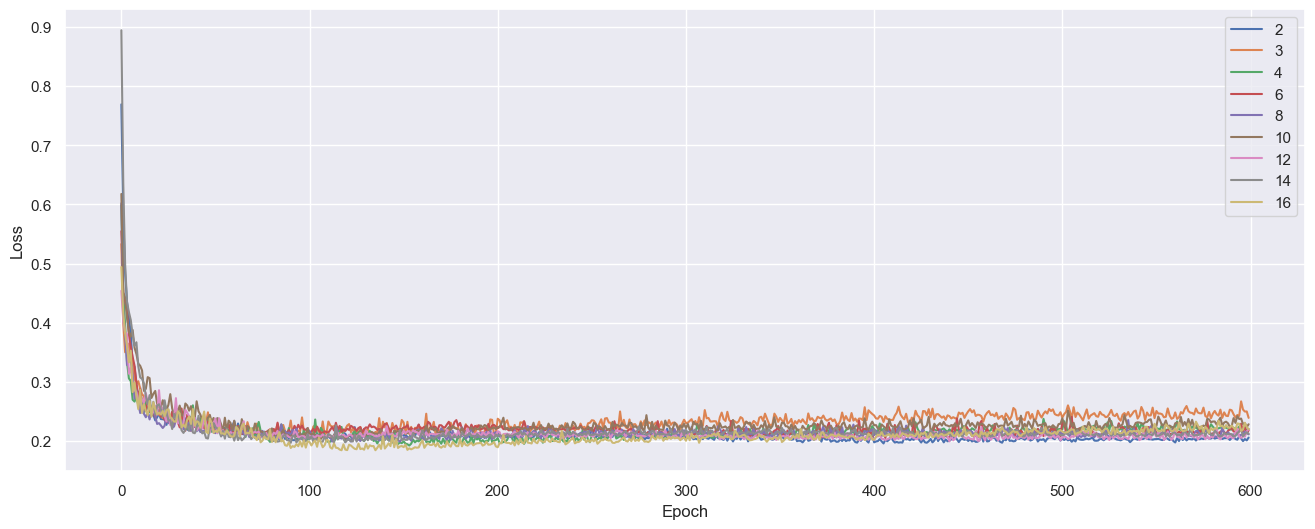

In [8]:
#Plotting the results
plt.figure(figsize = [16, 6])
for parameter, hist in scores.items():
    plt.plot(hist['val_mae'], label=parameters)

plt.legend(parameters)
#plt.xlim(400,600)
#plt.ylim(0.2,0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [9]:
pd.DataFrame(results0, index=['r2_train', 'r2_test', 'mean_abs_error', 'mean_sq_error', 'mean_abs_percent_error'])

,2,3,4,6,8,10,12,14,16
r2_train,0.89554,0.91869,0.91966,0.88106,0.92023,0.92054,0.90853,0.88149,0.90732
r2_test,0.79993,0.75336,0.58446,0.79244,0.62701,0.53852,0.67302,0.50598,0.60563
mean_abs_error,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000
mean_sq_error,2.00000,2.00000,3.00000,2.00000,3.00000,3.00000,2.00000,3.00000,3.00000
mean_abs_percent_error,20.40000,22.60000,27.10000,19.80000,26.10000,29.40000,23.60000,37.00000,26.20000


In [10]:
pd.DataFrame(results1, index=['r2_train', 'r2_test', 'mean_abs_error', 'mean_sq_error', 'mean_abs_percent_error'])

,2,3,4,6,8,10,12,14,16
r2_train,0.69089,0.72294,0.64512,0.68704,0.61522,0.70718,0.67346,0.65519,0.70340
r2_test,0.66431,0.71235,0.71268,0.70427,0.72851,0.68696,0.59610,0.71772,0.71701
mean_abs_error,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean_sq_error,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean_abs_percent_error,13.10000,12.60000,14.30000,13.10000,14.80000,14.50000,17.90000,13.10000,13.70000


Using the same method, the following parameter combinations were run:

- Activation function 1: [Linear, Relu, Elu, Swish, Tanh, Sigmoid, Hard Sigmoid]
- Activation function 2: [Linear, Relu, Elu, Swish, Tanh, Sigmoid, Hard Sigmoid]
- Kernel initializer: [glorot normal, glorot uniform, he normal, he uniform]
- Batch size: [3, 4, 5, 6, 7, 8]
- Maximum epochs: [100, 200, 300, 400, 500, 600, 700]
- Learning rate: [0.1, 0.01, 0.005, 0.001]
- Optimizer: [Adam, RMSprop]
- Dropout rate: [0, 0.01, 0.03, 0.05, 0.1, 0.2]

After running all the above combinations, the final parameters will be as following:

- hidden layers neurons: 3
- Activation function 1: Tanh
- Activation function 2: Relu
- Kernel initializer: he normal
- Batch size: 4
- Maximum epochs: 600
- Learning rate: 0.005
- Optimizer: RMSprop
- Dropout rate: 0.03

3 neurons
tanh/sigmoid
relu/elu
he_normal
0.03
600
3/4

## Running the Final Model and Comparing the Results

In [11]:
model = Sequential()
model.add(Dense(units=3, activation='tanh', kernel_initializer='he_normal', input_shape=(input_layer_size,)))
model.add(Dropout(0.03))
model.add(Dense(2, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss = 'mse', metrics = ['mae'])
history = model.fit(x_train, y_train, batch_size=4, epochs=600,
                        validation_data=(x_validate, y_validate), verbose = 1) 

Epoch 1/600
16/16 [==============================] - 1s 12ms/step - loss: 0.8284 - mae: 0.7373 - val_loss: 0.7972 - val_mae: 0.6763
Epoch 2/600
16/16 [==============================] - 0s 3ms/step - loss: 0.6410 - mae: 0.6548 - val_loss: 0.5971 - val_mae: 0.5869
Epoch 3/600
16/16 [==============================] - 0s 3ms/step - loss: 0.5084 - mae: 0.5930 - val_loss: 0.4329 - val_mae: 0.5018
Epoch 4/600
16/16 [==============================] - 0s 3ms/step - loss: 0.3929 - mae: 0.5273 - val_loss: 0.3020 - val_mae: 0.4327
Epoch 5/600
16/16 [==============================] - 0s 3ms/step - loss: 0.3289 - mae: 0.4812 - val_loss: 0.2244 - val_mae: 0.3846
Epoch 6/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2803 - mae: 0.4474 - val_loss: 0.1754 - val_mae: 0.3455
Epoch 7/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2641 - mae: 0.4235 - val_loss: 0.1520 - val_mae: 0.3185
Epoch 8/600
16/16 [==============================] - 0s 3ms/step - loss: 0.2286 - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0651 - mae: 0.1911 - val_loss: 0.0977 - val_mae: 0.2174
Epoch 64/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0441 - mae: 0.1675 - val_loss: 0.0950 - val_mae: 0.2142
Epoch 65/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0738 - mae: 0.2021 - val_loss: 0.0945 - val_mae: 0.2144
Epoch 66/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0638 - mae: 0.1922 - val_loss: 0.0946 - val_mae: 0.2134
Epoch 67/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0657 - mae: 0.1869 - val_loss: 0.0953 - val_mae: 0.2146
Epoch 68/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0502 - mae: 0.1770 - val_loss: 0.0938 - val_mae: 0.2137
Epoch 69/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0628 - mae: 0.1900 - val_loss: 0.0948 - val_mae: 0.2148
Epoch 70/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0546 - mae: 0

Epoch 125/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0412 - mae: 0.1537 - val_loss: 0.0944 - val_mae: 0.2195
Epoch 126/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0480 - mae: 0.1611 - val_loss: 0.0954 - val_mae: 0.2202
Epoch 127/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0563 - mae: 0.1745 - val_loss: 0.0941 - val_mae: 0.2181
Epoch 128/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0445 - mae: 0.1622 - val_loss: 0.0950 - val_mae: 0.2193
Epoch 129/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0441 - mae: 0.1656 - val_loss: 0.0950 - val_mae: 0.2195
Epoch 130/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0506 - mae: 0.1738 - val_loss: 0.0935 - val_mae: 0.2167
Epoch 131/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0553 - mae: 0.1726 - val_loss: 0.0934 - val_mae: 0.2173
Epoch 132/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0564 - mae: 0.1696 - val_loss: 0.0923 - val_mae: 0.2191
Epoch 187/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0418 - mae: 0.1586 - val_loss: 0.0919 - val_mae: 0.2182
Epoch 188/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0657 - mae: 0.1721 - val_loss: 0.0900 - val_mae: 0.2167
Epoch 189/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0523 - mae: 0.1707 - val_loss: 0.0903 - val_mae: 0.2177
Epoch 190/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0438 - mae: 0.1593 - val_loss: 0.0901 - val_mae: 0.2165
Epoch 191/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.1710 - val_loss: 0.0909 - val_mae: 0.2183
Epoch 192/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1555 - val_loss: 0.0911 - val_mae: 0.2171
Epoch 193/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0425 -

Epoch 248/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0447 - mae: 0.1615 - val_loss: 0.0885 - val_mae: 0.2173
Epoch 249/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0407 - mae: 0.1584 - val_loss: 0.0881 - val_mae: 0.2170
Epoch 250/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0411 - mae: 0.1622 - val_loss: 0.0885 - val_mae: 0.2170
Epoch 251/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0467 - mae: 0.1658 - val_loss: 0.0902 - val_mae: 0.2197
Epoch 252/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.1724 - val_loss: 0.0873 - val_mae: 0.2149
Epoch 253/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0401 - mae: 0.1570 - val_loss: 0.0888 - val_mae: 0.2171
Epoch 254/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0491 - mae: 0.1630 - val_loss: 0.0915 - val_mae: 0.2234
Epoch 255/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0437 - mae: 0.1656 - val_loss: 0.0882 - val_mae: 0.2175
Epoch 310/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0417 - mae: 0.1564 - val_loss: 0.0879 - val_mae: 0.2167
Epoch 311/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0443 - mae: 0.1617 - val_loss: 0.0884 - val_mae: 0.2184
Epoch 312/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0414 - mae: 0.1615 - val_loss: 0.0872 - val_mae: 0.2163
Epoch 313/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0476 - mae: 0.1654 - val_loss: 0.0898 - val_mae: 0.2214
Epoch 314/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0587 - mae: 0.1784 - val_loss: 0.0885 - val_mae: 0.2171
Epoch 315/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0511 - mae: 0.1738 - val_loss: 0.0872 - val_mae: 0.2156
Epoch 316/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0459 -

Epoch 371/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1748 - val_loss: 0.0881 - val_mae: 0.2186
Epoch 372/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0449 - mae: 0.1647 - val_loss: 0.0895 - val_mae: 0.2210
Epoch 373/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0473 - mae: 0.1725 - val_loss: 0.0877 - val_mae: 0.2183
Epoch 374/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.1660 - val_loss: 0.0883 - val_mae: 0.2192
Epoch 375/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0388 - mae: 0.1557 - val_loss: 0.0912 - val_mae: 0.2230
Epoch 376/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0433 - mae: 0.1619 - val_loss: 0.0888 - val_mae: 0.2202
Epoch 377/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - mae: 0.1592 - val_loss: 0.0879 - val_mae: 0.2189
Epoch 378/600
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0493 - mae: 0.1665 - val_loss: 0.0868 - val_mae: 0.2173
Epoch 433/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0454 - mae: 0.1642 - val_loss: 0.0880 - val_mae: 0.2189
Epoch 434/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0470 - mae: 0.1705 - val_loss: 0.0888 - val_mae: 0.2205
Epoch 435/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0486 - mae: 0.1694 - val_loss: 0.0893 - val_mae: 0.2206
Epoch 436/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0395 - mae: 0.1592 - val_loss: 0.0874 - val_mae: 0.2184
Epoch 437/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0422 - mae: 0.1612 - val_loss: 0.0879 - val_mae: 0.2187
Epoch 438/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0437 - mae: 0.1618 - val_loss: 0.0874 - val_mae: 0.2174
Epoch 439/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0368 -

Epoch 494/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0465 - mae: 0.1622 - val_loss: 0.0882 - val_mae: 0.2208
Epoch 495/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0505 - mae: 0.1692 - val_loss: 0.0888 - val_mae: 0.2205
Epoch 496/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0432 - mae: 0.1629 - val_loss: 0.0879 - val_mae: 0.2205
Epoch 497/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0428 - mae: 0.1553 - val_loss: 0.0896 - val_mae: 0.2213
Epoch 498/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.1591 - val_loss: 0.0891 - val_mae: 0.2214
Epoch 499/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0417 - mae: 0.1625 - val_loss: 0.0888 - val_mae: 0.2216
Epoch 500/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0404 - mae: 0.1567 - val_loss: 0.0882 - val_mae: 0.2209
Epoch 501/600
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0497 - mae: 0.1713 - val_loss: 0.0874 - val_mae: 0.2187
Epoch 556/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0475 - mae: 0.1682 - val_loss: 0.0872 - val_mae: 0.2183
Epoch 557/600
16/16 [==============================] - 0s 4ms/step - loss: 0.0488 - mae: 0.1732 - val_loss: 0.0875 - val_mae: 0.2185
Epoch 558/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0369 - mae: 0.1546 - val_loss: 0.0874 - val_mae: 0.2182
Epoch 559/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0405 - mae: 0.1605 - val_loss: 0.0877 - val_mae: 0.2188
Epoch 560/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1569 - val_loss: 0.0869 - val_mae: 0.2182
Epoch 561/600
16/16 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1682 - val_loss: 0.0872 - val_mae: 0.2179
Epoch 562/600
16/16 [==============================] - 0s 2ms/step - loss: 0.0393 -

In [12]:
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

1/1 [==============================] - 0s 65ms/step


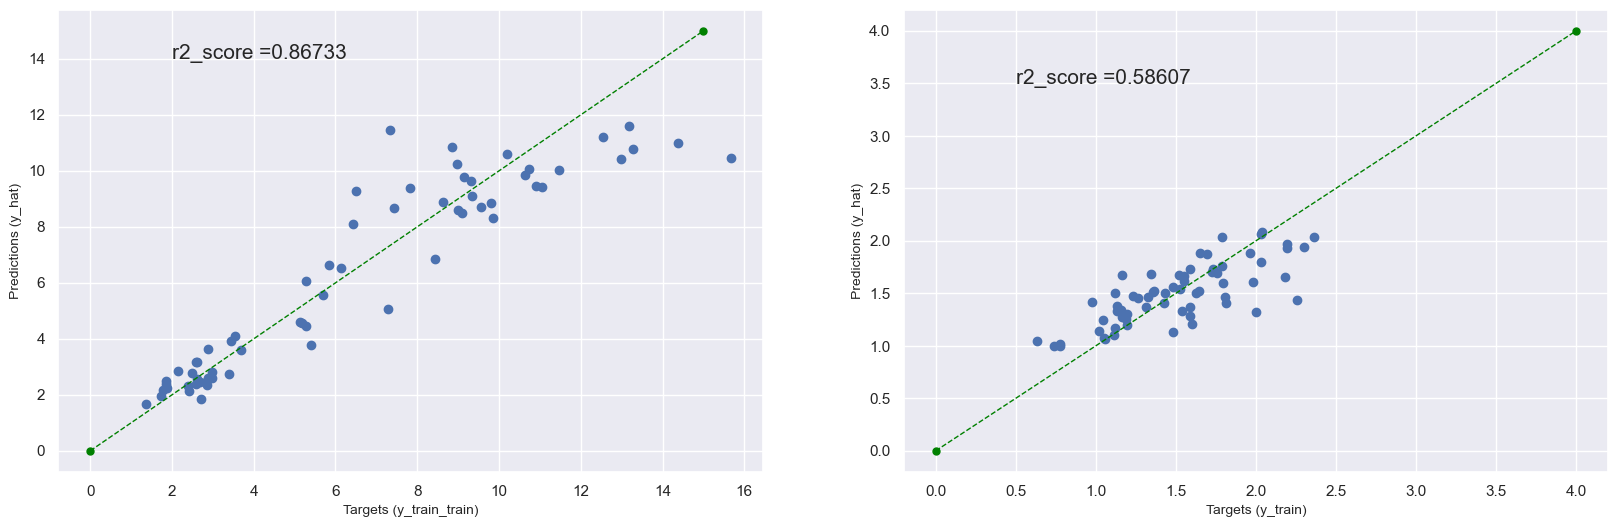

In [13]:
r2_train0 = str(np.round(r2_score(np.exp(y_train[:,0]), np.exp(y_hat_train[:,0])),5))
r2_train1 = str(np.round(r2_score(np.exp(y_train[:,1]), np.exp(y_hat_train[:,1])),5))

plt.figure(figsize = [20, 6])
plt.subplot(1,2,1)
plt.scatter(np.exp(y_train[:,0]), np.exp(y_hat_train[:,0]))
plt.xlabel('Targets (y_train_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,15], [0, 15], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.annotate('r2_score =' + r2_train0, xy=(2,14), fontsize=15)

plt.subplot(1,2,2)
plt.scatter(np.exp(y_train[:,1]), np.exp(y_hat_train[:,1]))
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,4], [0, 4], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.annotate('r2_score =' + r2_train1, xy=(0.5,3.5), fontsize=15);

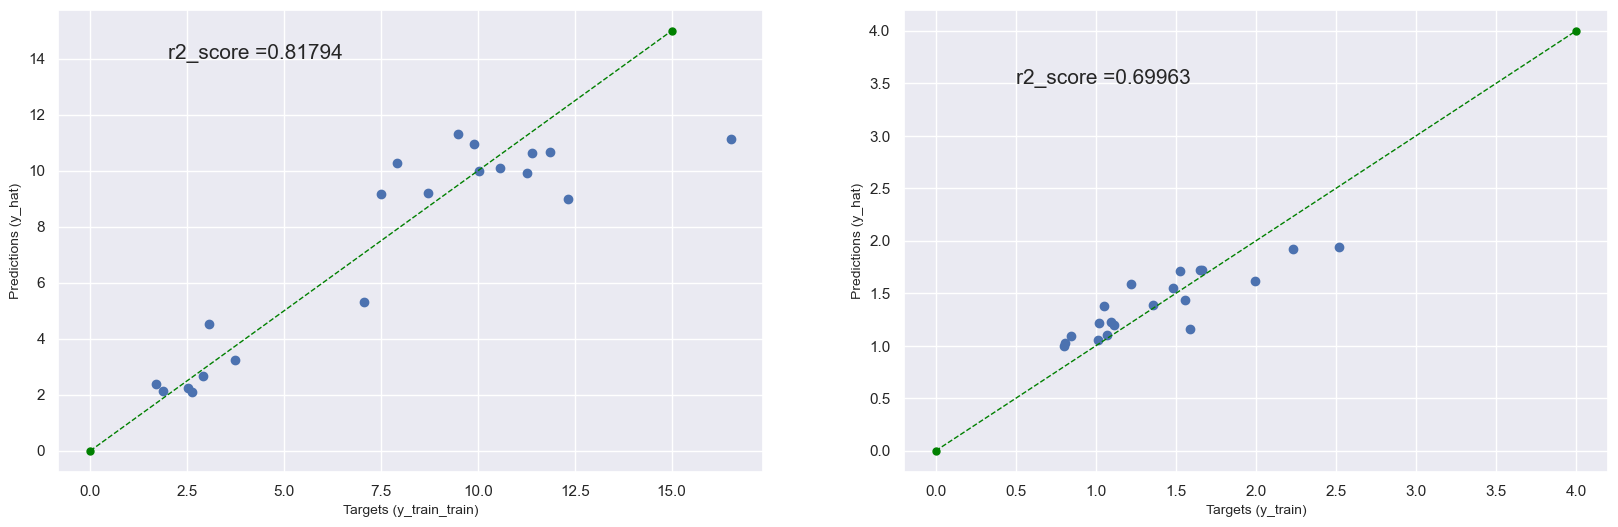

In [14]:
r2_test0 = str(np.round(r2_score(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0])),5))
r2_test1 = str(np.round(r2_score(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1])),5))

plt.figure(figsize = [20, 6])
plt.subplot(1,2,1)
plt.scatter(np.exp(y_test[:,0]), np.exp(y_hat_test[:,0]))
plt.xlabel('Targets (y_train_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,15], [0, 15], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.annotate('r2_score =' + r2_test0, xy=(2,14), fontsize=15)

plt.subplot(1,2,2)
plt.scatter(np.exp(y_test[:,1]), np.exp(y_hat_test[:,1]))
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,4], [0, 4], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.annotate('r2_score =' + r2_test1, xy=(0.5,3.5), fontsize=15);

In [15]:
save_model(model, "ANN_model.h5")

scaler = pickle.dump(sc_x, open('scaler.pkl', 'wb'))